In [1]:
import datetime as dt
import pandas as pd
import packages.db as db
import packages.i18n as i18n
import packages.definitions as d

locale = i18n.Locale.JA
date_from = dt.date(2023, 4, 1)
date_to = dt.date(2023, 4, 30)
battles = db.load_battles(lobby=d.Lobby.XMATCH, date_from=date_from, date_to=date_to)
battles["mode"].value_counts()

area      11508
hoko       9122
yagura     9036
asari      6284
Name: mode, dtype: int64

In [2]:
mode_count = battles["mode"].value_counts().reset_index().set_axis(["mode", "count"], axis=1)
mode_count["order"] = mode_count["mode"].map(lambda x: d.MODE_ORDER.index(x))
mode_count = mode_count.sort_values("order").drop(columns="order")
mode_count

,mode,count
0,area,11508
2,yagura,9036
1,hoko,9122
3,asari,6284


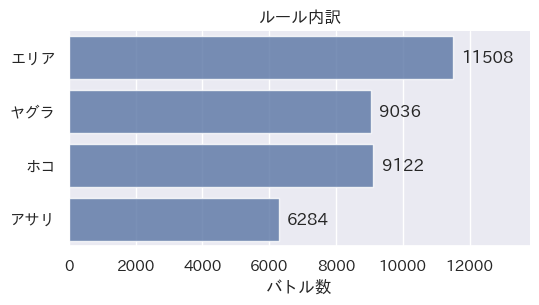

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from packages.japanize import japanize

sns.set_theme()
japanize()

translations = i18n.get_translations(custom_translation_df=pd.DataFrame([
    { "key": "breakdown", "name-ja": "ルール内訳", "name-en": "Breakdown of battles" },
    { "key": "battle_num", "name-ja": "バトル数", "name-en": "Number of battles" },
]), locale=locale)

g = sns.catplot(
    data=mode_count,
    x="count",
    y="mode",
    kind="bar",
    color="b",
    alpha=0.8,
    height=3,
    aspect=2,
)
ax = g.ax
ax.bar_label(ax.containers[0], fmt="%.0f", padding=6)
ax.set(
    title=translations["breakdown"],
    xlabel=translations["battle_num"],
    ylabel="",
    yticklabels=map(lambda x: translations[x], d.MODE_ORDER),
    xlim=(0, mode_count["count"].max() * 1.2),
)
plt.show()

In [4]:
power_agg = battles["power"].describe()
power_agg

count    34240.000000
mean      2021.856489
std        275.764133
min       1219.300000
25%       1842.900000
50%       2003.300000
75%       2214.800000
max       2963.700000
Name: power, dtype: float64

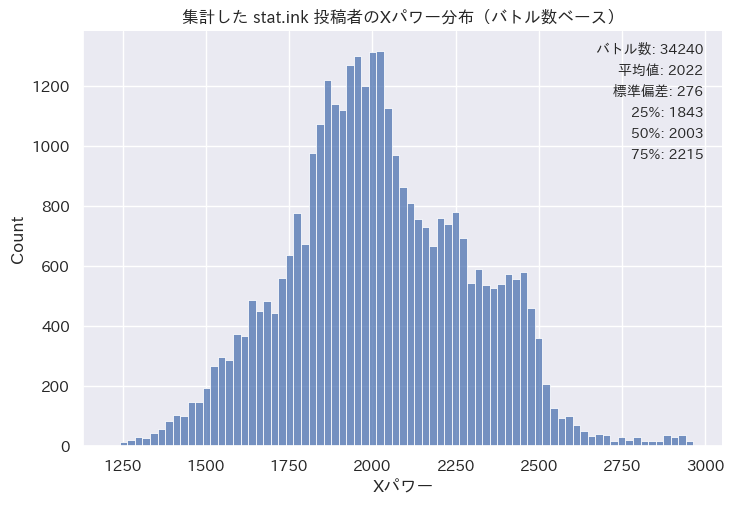

In [5]:
power_agg = battles["power"].describe()

translations = i18n.get_translations(custom_translation_df=pd.DataFrame([
    { "key": "title", "name-ja": "集計した stat.ink 投稿者のXパワー分布（バトル数ベース）", "name-en": "X Power distribution of stat.ink users (based on number of battles)" },
    { "key": "power", "name-ja": "Xパワー", "name-en": "X Power" },
    { "key": "battle_num", "name-ja": "バトル数", "name-en": "Number of battles" },
    { "key": "mean", "name-ja": "平均値", "name-en": "Average" },
    { "key": "sd", "name-ja": "標準偏差", "name-en": "Standard deviation" },
]), locale=locale)

g = sns.displot(
    data=battles,
    x="power",
    height=5,
    aspect=1.5,
)
ax = g.ax
ax.set(
    title=translations["title"],
    xlabel=translations["power"],
)
ax.text(
    0.97,
    0.97,
    f"{translations['battle_num']}: {round(power_agg.loc['count'])}\n{translations['mean']}: {round(power_agg.loc['mean'])}\n{translations['sd']}: {round(power_agg.loc['std'])}\n25%: {round(power_agg.loc['25%'])}\n50%: {round(power_agg.loc['50%'])}\n75%: {round(power_agg.loc['75%'])}",
    ha="right",
    va="top",
    fontsize=10,
    linespacing=1.8,
    transform=ax.transAxes,
)

plt.show()